In [1]:
batch_size = 32
look_back = 3

In [951]:
# klines = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220102090000_20220102205900.csv')
# klines2 = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220102210000_20220103085900.csv')

(98149, 10)

In [8]:
import os
import numpy as np
import pandas as pd

def search(dirname):
    fileList = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        if filename != '.DS_Store' :
            full_filename = os.path.join(dirname, filename)
            fileList.append(full_filename)

    return fileList


def create_LSTM_dataset(data) :
    data_arr = data
    x_arr = []
    y_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 0:data_arr.shape[1]])
        y_arr.append(data_arr[i + look_back, 3])

    x_arr, y_arr = np.array(x_arr), np.array(y_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1],x_arr.shape[2]))

    return x_arr, y_arr


def create_LSTM_dataset_many_to_many(data):
    data_arr = data
    x_arr = []
    y_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 1:data_arr.shape[1]])
        y_arr.append(data_arr[i + look_back, 0:3])

    x_arr = np.array(x_arr)
    y_arr = np.array(y_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], x_arr.shape[2]))
    y_arr = np.reshape(y_arr, (y_arr.shape[0], y_arr.shape[1]))

    return x_arr, y_arr


def create_LSTM_dataset_X(data):
    data_arr = data
    x_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 0:data_arr.shape[1]])

    x_arr = np.array(x_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], x_arr.shape[2]))

    return x_arr

def create_LSTM_dataset_Y(data):
    data_arr = data
    y_arr = []

    for i in range(len(data_arr) - look_back):
        y_arr.append(data_arr[i + look_back, 0:data_arr.shape[1]])

    y_arr = np.array(y_arr)
    y_arr = np.reshape(y_arr, (y_arr.shape[0], y_arr.shape[1]))

    return y_arr


In [9]:
path = 'resource/dataset/binance/'

fileList = search(path)
fileList = np.sort(fileList)

fileList

array(['resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220101210000_20220102085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220102090000_20220102205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220102210000_20220103085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220103090000_20220103205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220103210000_20220104085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220104090000_20220104205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220104210000_20220105085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220105090000_20220105205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220105210000_20220106085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220106090000_20220106205900.csv',
       'resource/dataset/binance/klines-BTC

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

klines = pd.DataFrame()

for i in range(len(fileList) - 1) :
    fileNm = fileList[i]
    tmp = pd.read_csv(fileNm)
    klines = pd.concat([klines,tmp])

klines.index = klines['openTime']

# klines_dataset = pd.DataFrame({'close':klines['close'].diff(axis=1)
#                                 ,'volume': klines['volume'].diff()
#                                 ,'buyVolume': klines['takerBuyBaseAssetVolume'].diff()
#                                 , 'sellVolume': klines['takerBuyQuoteAssetVolume'].diff()
#                                 , 'trades' : klines['numberOfTrades'].diff()})

klines_dataset = pd.DataFrame(klines.diff())

klines_dataset = klines_dataset.dropna()
del klines_dataset['openTime']
del klines_dataset['closeTime']
del klines_dataset['ignore']
#
# del klines_dataset['open']
# del klines_dataset['volume']
# del klines_dataset['quoteAssetVolume']
# del klines_dataset['numberOfTrades']

In [5]:
klines.tail()

,openTime,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore
openTime,,,,,,,,,,,,
20220417205500,20220417205500,40410.01,40418.70,40410.00,40415.05,5.98961,20220417205559,2.420582e+05,266,3.37658,1.364525e+05,0
20220417205600,20220417205600,40415.05,40418.11,40415.05,40418.11,2.58289,20220417205659,1.043880e+05,206,1.51172,6.109643e+04,0
20220417205700,20220417205700,40418.10,40428.00,40418.10,40427.99,3.27337,20220417205759,1.323285e+05,223,2.62758,1.062212e+05,0
20220417205800,20220417205800,40428.00,40450.00,40427.99,40450.00,12.03535,20220417205859,4.866479e+05,293,9.41325,3.806074e+05,0
20220417205900,20220417205900,40450.00,40485.00,40449.99,40464.77,49.43071,20220417205959,2.000617e+06,476,29.61010,1.198329e+06,0


<AxesSubplot:>

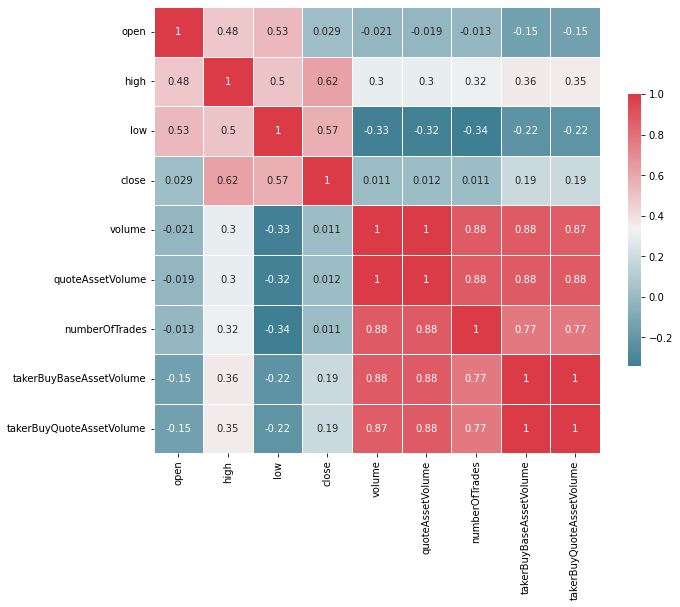

In [155]:
corrDf = klines_dataset.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrDf, cmap=cmap, annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [1384]:
# train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1, shuffle=False)


,open,high,low,close
openTime,,,,
20220101090100,33.07,73.15,26.02,62.76
20220101090200,62.76,37.46,58.36,55.97
20220101090300,55.97,9.80,21.51,-37.65
20220101090400,-37.66,-55.39,-14.26,-9.74
20220101090500,-9.73,107.46,-20.00,114.69
...,...,...,...,...
20220327134300,17.25,2.16,3.26,-13.98
20220327134400,-13.99,-16.14,-32.57,-32.58
20220327134500,-32.57,-22.91,-4.46,9.67


In [11]:
# 학습데이터 분류
train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1, shuffle=False)
# train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1)

# 검증데이터 분류
train, val = train_test_split(train, test_size=0.2, random_state=1, shuffle=False)
# train, val = train_test_split(train, test_size=0.2, random_state=1, shuffle=False)
# train, val = train_test_split(train_scaled, test_size=0.2, random_state=1)

x_train = train[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]
x_val = val[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]
x_test = test[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]

y_train = train[['open','high','low']]
y_val = val[['open','high','low']]
y_test = test[['open','high','low']]

# 전처리 : 정규화
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_val_scaled = x_scaler.transform(x_val)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)


x_train_scaled = create_LSTM_dataset_X(x_train_scaled)
x_val_scaled = create_LSTM_dataset_X(x_val_scaled)
x_test_scaled = create_LSTM_dataset_X(x_test_scaled)

y_train_scaled = create_LSTM_dataset_Y(y_train_scaled)
y_val_scaled = create_LSTM_dataset_Y(y_val_scaled)
y_test_scaled = create_LSTM_dataset_Y(y_test_scaled)
# x_val, y_val = create_LSTM_dataset_many_to_many(val)
# x_test, y_test = create_LSTM_dataset_many_to_many(test)

print(x_train_scaled.shape)

# x_train, y_train = create_LSTM_dataset(train)
# x_val, y_val = create_LSTM_dataset(val)
# x_test, y_test = create_LSTM_dataset(test_scaled)

# x_train, y_train = create_LSTM_dataset_many_to_many(np.array(train))
# x_val, y_val = create_LSTM_dataset_many_to_many(val)
# x_test, y_test = create_LSTM_dataset_many_to_many(test)




#
# x_train, y_train = create_LSTM_dataset_many_to_many(np.array(train))
# x_val, y_val = create_LSTM_dataset_many_to_many(np.array(val))
# x_test, y_test = create_LSTM_dataset_many_to_many(np.array(test))



(98146, 3, 8)


In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(18, input_shape=(look_back, x_train.shape[2]), return_sequences=True))
# model.add(tf.keras.layers.Input(shape=(look_back, x_train.shape[2])))
# model.add(tf.keras.layers.LSTM(2))
# model.add(tf.keras.layers.LSTM(4, input_shape=(look_back, x_train.shape[2]), return_sequences=True, activation='relu'))
model.add(tf.keras.layers.LSTM(128, input_shape=(look_back, x_train_scaled.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.LSTM(64))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.5))
#
# model.add(tf.keras.layers.LSTM(16))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4, activation='linear')))
model.add(tf.keras.layers.Dense(3, activation='linear'))
# model.add(tf.keras.layers.Dense(4, activation='linear'))

2022-05-04 15:48:22.541333: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# sgd = tf.keras.optimizers.Adam(learning_rate=0.00000001)
# model.compile(loss='mse',optimizer=sgd,metrics=['accuracy'])

# from keras.optimizers import SGD
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = "mean_squared_error", optimizer = adam)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            70144     
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 202,115
Trainable params: 202,115
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(x_train_scaled, y_train_scaled, epochs=50, batch_size=512, validation_data=(x_val_scaled, y_val_scaled))

Epoch 1/50
192/192 [==============================] - 9s 32ms/step - loss: 0.0067 - val_loss: 3.6629e-04
Epoch 2/50
192/192 [==============================] - 9s 46ms/step - loss: 9.7511e-04 - val_loss: 3.6902e-04
Epoch 3/50
192/192 [==============================] - 10s 51ms/step - loss: 7.5521e-04 - val_loss: 3.7273e-04
Epoch 4/50
192/192 [==============================] - 10s 53ms/step - loss: 6.3438e-04 - val_loss: 3.5371e-04
Epoch 5/50
192/192 [==============================] - 9s 47ms/step - loss: 5.4924e-04 - val_loss: 3.3028e-04
Epoch 6/50
192/192 [==============================] - 11s 58ms/step - loss: 4.1712e-04 - val_loss: 2.3967e-04
Epoch 7/50
192/192 [==============================] - 14s 72ms/step - loss: 3.3321e-04 - val_loss: 2.0158e-04
Epoch 8/50
192/192 [==============================] - 14s 75ms/step - loss: 3.0023e-04 - val_loss: 1.8415e-04
Epoch 9/50
192/192 [==============================] - 14s 75ms/step - loss: 2.7967e-04 - val_loss: 1.8296e-04
Epoch 10/50
192/1

In [234]:

a = y_scaler.inverse_transform(y_test_scaled)
a

# b = x_scaler.inverse_transform(x_test_scaled[0])
# b


array([[-19.29,  -1.32,  -0.79],
       [  2.07, -15.9 , -16.48],
       [ -8.18,  -6.85,   1.33],
       ...,
       [  3.05,   9.89,   3.05],
       [  9.9 ,  22.  ,   9.89],
       [ 22.  ,  35.  ,  22.  ]])

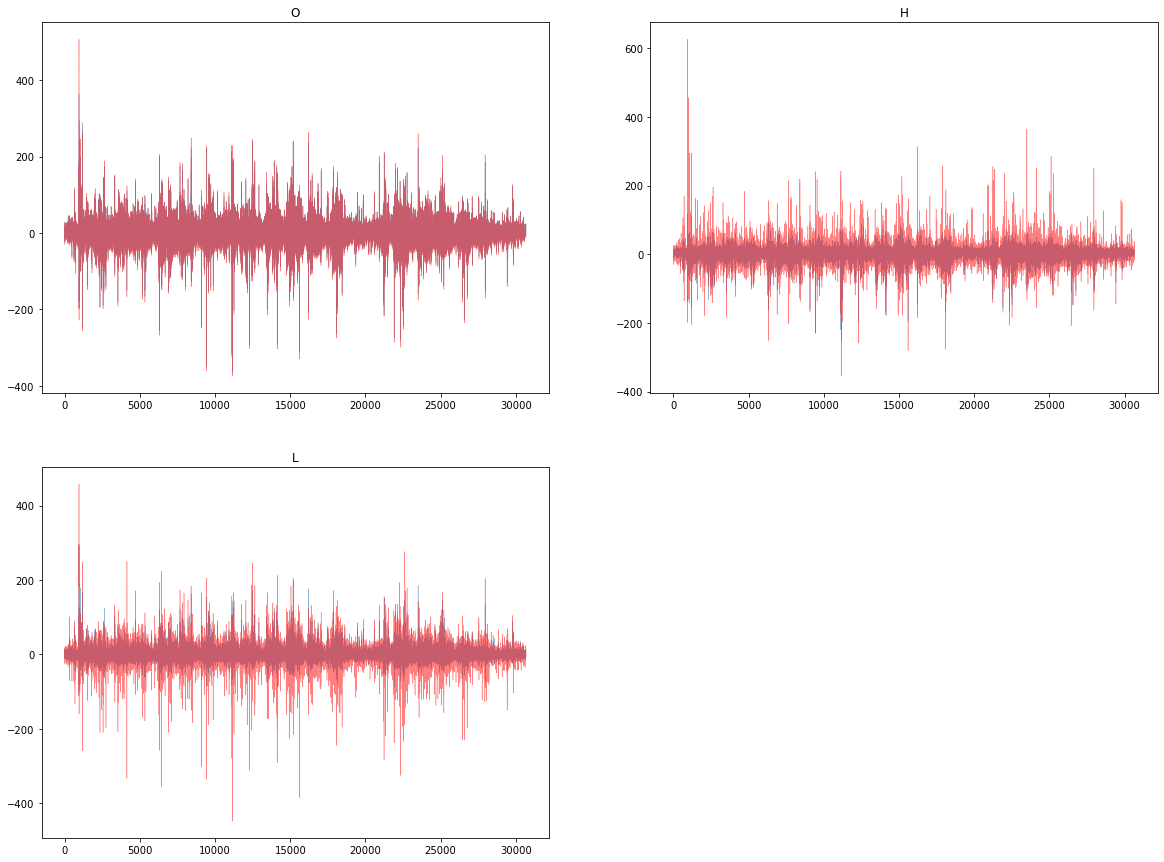

In [15]:
y_predict = model.predict(x_test_scaled)

real_predictions = y_scaler.inverse_transform(y_predict)
fact = y_scaler.inverse_transform(y_test_scaled)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,len(real_predictions))

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('O')
plt.plot(x, real_predictions[:,0],x, fact[:,0] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(222)
plt.title('H')
plt.plot(x, real_predictions[:,1],x, fact[:,1] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(223)
plt.title('L')
plt.plot(x, real_predictions[:,2],x, fact[:,2] , 'r-', linewidth='0.5', alpha=.5)

# plt.subplot(224)
# plt.title('C')
# plt.plot(x, real_predictions[:,3],x, fact[:,3] , 'r-', linewidth='0.5', alpha=.5)

plt.show()

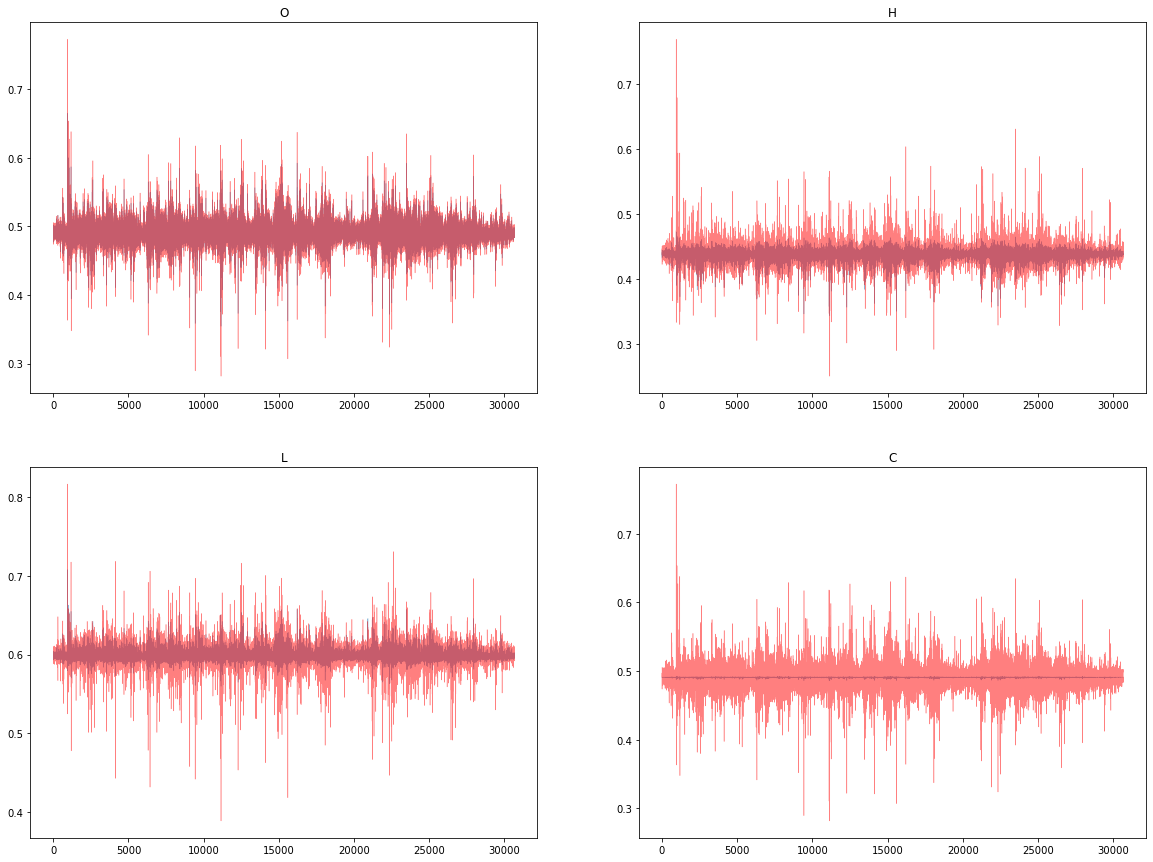

In [68]:
x = np.arange(0,len(real_predictions))

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('O')
plt.plot(x, y_predict[:,0],x, y_test[:,0] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(222)
plt.title('H')
plt.plot(x, y_predict[:,1],x, y_test[:,1] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(223)
plt.title('L')
plt.plot(x, y_predict[:,2],x, y_test[:,2] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(224)
plt.title('C')
plt.plot(x, y_predict[:,3],x, y_test[:,3] , 'r-', linewidth='0.5', alpha=.5)

plt.show()

In [1429]:
results = model.evaluate(x_test, y_test, batch_size=32)
results

959/959 [==============================] - 1s 1ms/step - loss: 2.3912e-04


0.00023912073811516166

In [ ]:
import matplotlib.pyplot as plt

origin = scaler.inverse_transform(y_test.reshape(y_test.shape[0],1))
predict = scaler.inverse_transform(y_predict)

plt.plot(origin, color='g')
plt.plot(predict, color='r')


In [16]:

# model = tf.keras.models.load_model("resource/model/regression_20220415.h5")
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("LSTM_Binance-Kline_20220504.h5")

# It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_h5_model.h5")

In [ ]:
import numpy as np
def create_dataset(signal_data, look_back=1):
    x_arr, y_arr = [], []
    for i in range(len(signal_data) - look_back):
        x_arr.append(signal_data[i:(i + look_back), 0])
        y_arr.append(signal_data[i + look_back, 0])

    x_arr = np.array(x_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], 1))
    return x_arr, np.array(y_arr)

klines_dataset = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv').to_numpy()

# 훈련
train = klines_dataset[0:int(len(klines_dataset) * 0.5)]
# 검증
val = klines_dataset[int(len(klines_dataset) * 0.5):int(len(klines_dataset) * 0.75)]
# 시험
test = klines_dataset[int(len(klines_dataset) * 0.75):-1]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)
